In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv('fish_data.csv')

In [3]:
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
data.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [6]:
data['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [7]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [8]:
X = data.drop('species', axis=1)
y = data['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [13]:
print("Akurasi Model:", accuracy)  
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.9362745098039216

Laporan Klasifikasi:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     Coilia dussumieri       1.00      1.00      1.00        77
Otolithoides biauritus       0.71      0.74      0.72        91
     Otolithoides pama       1.00      1.00      1.00        86
     Pethia conchonius       1.00      1.00      1.00        89
  Polynemus paradiseus       1.00      1.00      1.00       102
  Puntius lateristriga       1.00      1.00      1.00        65
        Setipinna taty       0.75      0.72      0.73       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.94       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.94      0.94      0.94       816



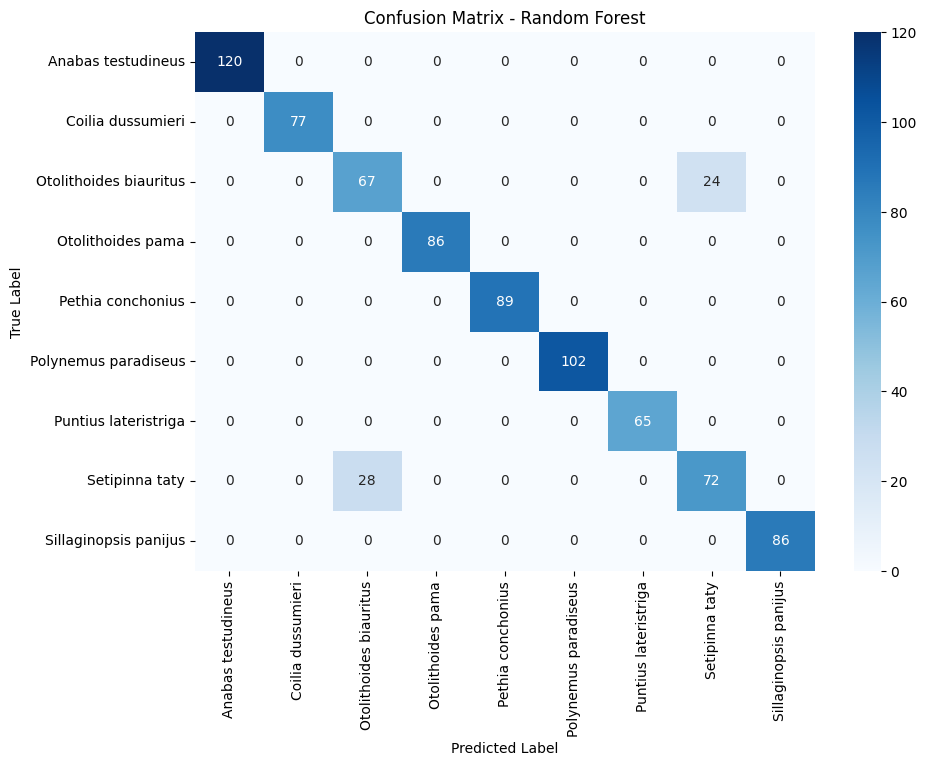

In [14]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 7))
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\yahya\AppData\Local\Temp\ipykernel_27104\2150307288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=rf_cm.diagonal(), palette="viridis")


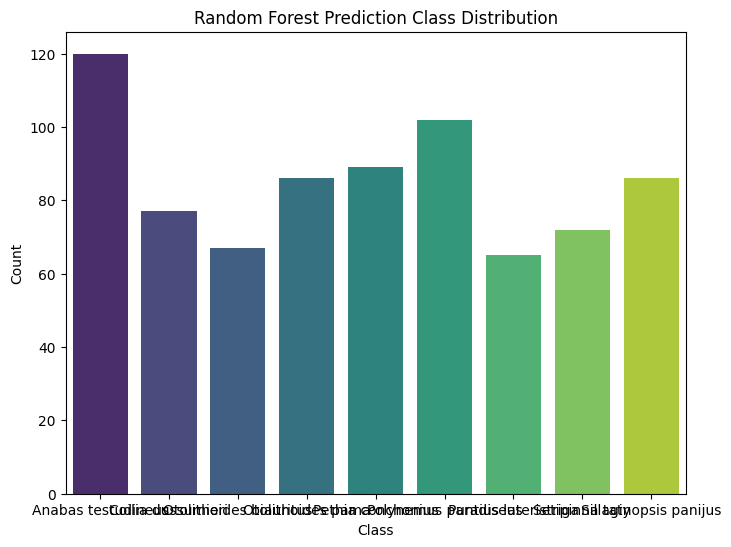

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=le.classes_, y=rf_cm.diagonal(), palette="viridis")
plt.title("Random Forest Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [16]:
new_data = pd.DataFrame({
    'length': [25.5, 30.1],  
    'weight': [200, 350],    
    'w_l_ratio': [0.65, 0.75] 
}) 
new_predictions = rf_model.predict(new_data)
new_species = le.inverse_transform(new_predictions)
for i, species in enumerate(new_species):
    print(f"Data baru {i+1}: Prediksi species = {species}")

Data baru 1: Prediksi species = Pethia conchonius
Data baru 2: Prediksi species = Sillaginopsis panijus


In [17]:
import pickle  
with open("randomforest_fish_model.pkl", "wb") as rf_file:
    pickle.dump(rf_model, rf_file)